In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [3]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

In [4]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [5]:
############# define run locations #############
short_locs = ['/home/jtindall/short_tank/short_tank_run_1/outputs']
short_titles = ['Short Tank']

full_locs = ['/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_1/outputs']
full_titles = ['Full Tank']

fq_titles = ['fiTQun']

In [6]:
# define plot params
short_linecolor = [c[0] for _ in short_locs]
short_linestyle = ['--' for _ in short_locs]

full_linecolor = [c[1] for _ in full_locs]
full_linestyle = [':' for _ in full_locs]

fq_linecolor = [c[2]]
fq_linestyle = ['-']

In [7]:
#fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [8]:
locs = short_locs + full_locs
titles = short_titles + full_titles + fq_titles
linecolor = short_linecolor + full_linecolor + fq_linecolor
linestyle = short_linestyle + full_linestyle + fq_linestyle

In [9]:
############# load short tank run data #############
short_idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_3M_OD_veto_idxs.npz'
short_indices = np.load(short_idx_file_path)['test_idxs']

short_raw_output_softmax    = [np.load(loc + "/softmax.npy") for loc in short_locs]
short_raw_actual_labels     = [np.load(loc + "/labels.npy") for loc in short_locs]

In [10]:
############# load full tank run data #############
full_idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
full_indices = np.load(full_idx_file_path)['test_idxs']

full_raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in full_locs]
full_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in full_locs]

## Load fiTQun data

In [11]:
from WatChMaL.analysis.fitqun_comparison_utils import load_fq_output, verify_fq_matching

In [12]:
# load parameters
npz_path = '/home/jtindall/presentation_links/Index_Storage'
idx_file_paths = ['/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
                  for _ in range(len(locs))]
preferred_run_idx = 0
cut_names= [['fq_failed', 'fq_flag'] for _ in range(len(locs))]

In [13]:
fq_rootfiles, fq_eventids, fq_flag, fq_scores, fq_mom, fq_labels = load_fq_output(mapping_indices_path=os.path.join(npz_path,'fq_mapping_idxs.npz'), 
                                                                                  fq_failed_idxs_path=os.path.join(npz_path,'fq_failed_idxs.npz'), 
                                                                                  test_idxs_path=idx_file_paths[preferred_run_idx], 
                                                                                  cut_path='/home/jtindall/indices/pointnet_cut_indices.npz', 
                                                                                  cut_list=cut_names[0])

In [14]:
"""
# TODO: fix root and id retrieval
filtered_dataset_rootfiles, filtered_dataset_eventids = # stored root and id files
verify_fq_matching(fq_rootfiles=fq_rootfiles, 
                   fq_eventids=fq_eventids, 
                   filtered_dataset_rootfiles=filtered_dataset_rootfiles, 
                   filtered_dataset_eventids=filtered_dataset_eventids)
"""

'\n# TODO: fix root and id retrieval\nfiltered_dataset_rootfiles, filtered_dataset_eventids = # stored root and id files\nverify_fq_matching(fq_rootfiles=fq_rootfiles, \n                   fq_eventids=fq_eventids, \n                   filtered_dataset_rootfiles=filtered_dataset_rootfiles, \n                   filtered_dataset_eventids=filtered_dataset_eventids)\n'

In [53]:
############# compute short tank multi e/gamma ROC #############
short_fprs, short_tprs, short_thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels, 
                                                         true_label=label_dict["$e$"], 
                                                         false_label=label_dict["$\gamma$"])

In [54]:
############# compute long tank multi e/gamma ROC #############
full_fprs, full_tprs, full_thrs = multi_compute_roc(full_raw_output_softmax, full_raw_actual_labels, 
                                                     true_label=label_dict["$e$"], 
                                                     false_label=label_dict["$\gamma$"])

In [45]:
############# compute fiTQun tank multi e/gamma ROC #############
# TODO: negative sign in fq_scores
fq_fprs, fq_tprs, fq_thrs = multi_compute_roc([-np.array(fq_scores)], [np.array(fq_labels)], 
                                                     true_label=label_dict["$e$"], 
                                                     false_label=label_dict["$\gamma$"])

In [55]:
############# combine short, long and fiTQun results #############
fprs = short_fprs + full_fprs + fq_fprs
tprs = short_tprs + full_tprs + fq_tprs
thrs = short_thrs + full_thrs + fq_thrs

In [72]:
print(len(fq_labels))
print(len(full_raw_actual_labels[0]))
print(len(short_raw_actual_labels[0]))

2066763
2224824
2756358


[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


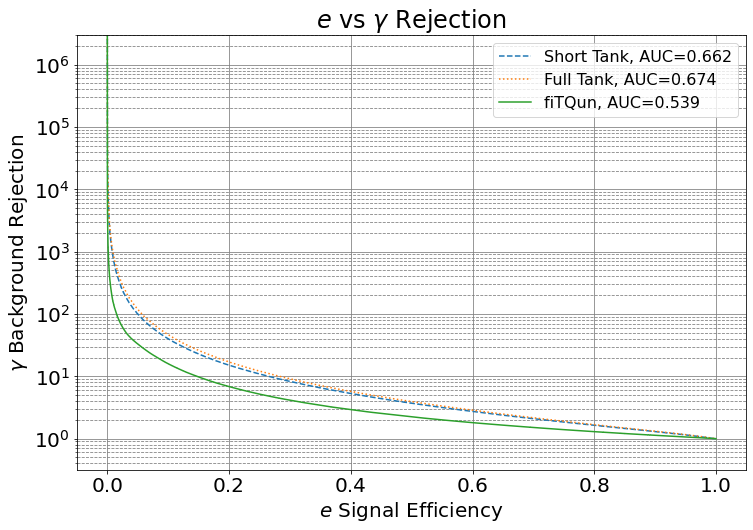

In [56]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [20]:
############# compute short multi e/mu ROC #############
short_fprs, short_tprs, short_thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

In [21]:
############# compute full multi e/mu ROC #############
full_fprs, full_tprs, full_thrs = multi_compute_roc(full_raw_output_softmax, full_raw_actual_labels,
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

In [22]:
############# combine short and long results #############
fprs =  short_fprs + full_fprs
tprs = short_tprs + full_tprs
thrs = short_thrs + full_thrs

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]


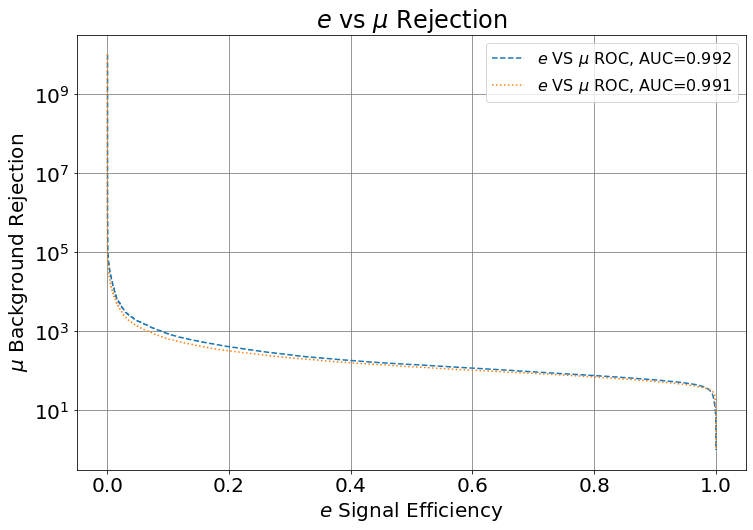

In [23]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=linestyle,linecolors=linecolor, show=False)

In [24]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

In [25]:
############# compute short collapsed ROC #############
short_collapsed_class_scores_list, short_collapsed_class_labels_list = multi_collapse_test_output(short_raw_output_softmax, short_raw_actual_labels, label_dict, ignore_type='$\gamma$')

short_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in short_collapsed_class_labels_list]
short_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in short_collapsed_class_scores_list]

In [26]:
short_fpr_list, short_tpr_list, short_thr_list = multi_compute_roc(short_collapsed_class_scores_list, short_collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

In [27]:
############# compute full collapsed ROC #############
full_collapsed_class_scores_list, full_collapsed_class_labels_list = multi_collapse_test_output(full_raw_output_softmax, full_raw_actual_labels, label_dict, ignore_type='$\gamma$')

full_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in full_collapsed_class_labels_list]
full_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in full_collapsed_class_scores_list]

In [28]:
full_fpr_list, full_tpr_list, full_thr_list = multi_compute_roc(full_collapsed_class_scores_list, full_collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

In [52]:
############# compute fiTQun collapsed ROC #############
"""
fq_collapsed_class_scores_list, fq_collapsed_class_labels_list = multi_collapse_test_output([np.array(fq_scores)], [np.array(fq_labels)], label_dict, ignore_type='$\gamma$')

fq_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in fq_collapsed_class_labels_list]
fq_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in fq_collapsed_class_scores_list]

fq_fpr_list, fq_tpr_list, fq_thr_list = multi_compute_roc(fq_collapsed_class_scores_list, fq_collapsed_class_labels_list, 
                                                             true_label=muon_softmax_index_dict["e/gamma"], 
                                                             false_label=muon_softmax_index_dict["mu"])
"""

In [66]:
############# compute fiTQun tank multi e/mu ROC #############
fq_fpr_list, fq_tpr_list, fq_thr_list = multi_compute_roc([np.array(fq_scores)], [np.array(fq_labels)],
                                                             true_label=label_dict["$e$"], 
                                                             false_label=label_dict["$\mu$"])

In [67]:
############# combine short and long results #############
fpr_list = short_fpr_list + full_fpr_list + fq_fpr_list
tpr_list = short_tpr_list + full_tpr_list + fq_tpr_list
thr_list = short_thr_list + full_thr_list + fq_thr_list

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


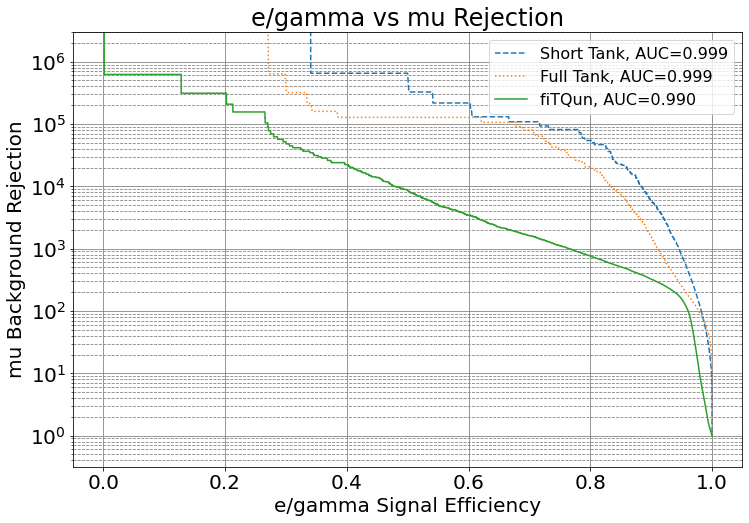

In [68]:
figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


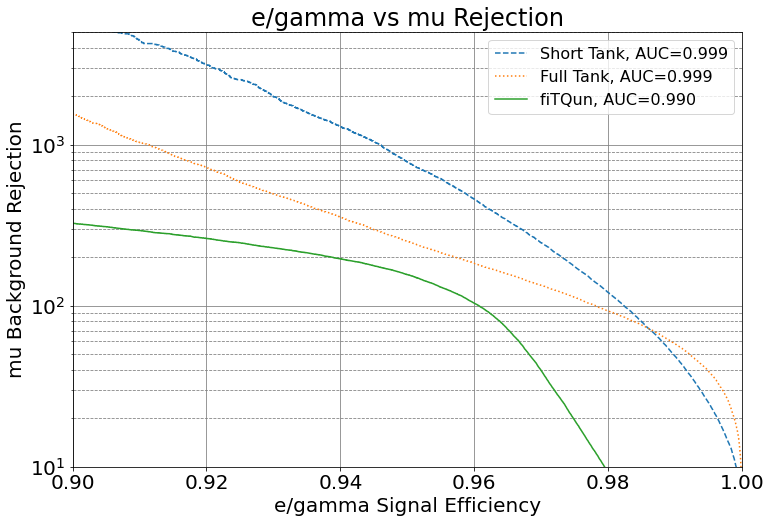

In [75]:
figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1],
                      xlims=[[0.9,1.0]], ylims=[[1e1,5e3]],
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)